# CNN
- CNN은 이미지에서 중요한 패턴만 추출하고, 파라미터 수를 줄이면서도 성능을 높일 수 있는 신경망 구조
- 이미지 인식 문제에서는 DNN보다 CNN이 훨씬 더 효과적이다
- 컨볼루션 신경망은 여러 레이어를 연결하여 신경망 구축
- 

## 완전연결 신경망 vs 컨볼루션 신경망
### 완전연결 신경망(DNN)
- 모든 뉴런이 다음 층 모든 뉴런에 연결
- Dense Layer 사용
- 벡터 데이터 (Flatten된 이미지)만 처리
- 이미지를 1차원 벡터로 평탄화한 뒤 Dense Layer에 입력
### 컨볼루션 신경망(CNN)
- 지역적인 영역만 연결
- Conv2D, MaxPooling, Flatten, Dense 사용
- 이미지, 영상, 시각패턴
- 이미지를 그대로 2D 형태로 받아서, Conv 필터로 특징 추출

## 컨볼루션 연산
- 이미지를 작은 격자(필터, 커널)가 슬라이딩하면서 겹치는 부분의 곱과 합을 계산하는 연산
- 이 연산을 통해 이미지의 특징(선, 모서리, 패턴)을 자동으로 뽑아낸다
- **필터의 가중치는 미리 만들어지는것이 아닌, 연산하면서 변경된다.**

## 보폭
- 커널을 적용하는 거리

## 패딩
- 이미지의 가장자리를 처리하기 위한 기법
### valid
- 커널을 입력 이미지 안에서만 움직임, 가장자리 픽셀을 처리하지 않음
### same
- 입력 이미지의 주변을 특정값으로 채우는 것

## 풀링(서브 샘플링)
- 입력 데이터의 크기를 줄이며 입력 데이터를 요약하는 연산
- 데이터의 크기는 줄어들며, 입력 데이터의 깊이는 건드리지 않는다
- 최대풀링, 평균풀링 기법이 존재한다

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 입력 차원 맞추기
# CNN은 3차원 이미지 형식을 데이터로 받아야하기 때문
# 아래 이미지는 채널 수가 1이므로 흑백을 의미
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# 컨볼루션 신경망 생성
# 합성곱 레이어와 풀링 레이어를 번갈아가며 생성
# 평탄화 실행 후 Dense Layer에 전달
# 마지막으로 은닉층과 출력층을 지남 
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 0~9 숫자 분류
])

# 모델 구조 출력
print(model.summary())

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [3]:
# 컴파일과 훈련
# optimizer=adam, loss function=sparse_categorical_crossentropy(One Hot Encoding 자동)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9047 - loss: 0.3146
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9854 - loss: 0.0484
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9898 - loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9931 - loss: 0.0212
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9949 - loss: 0.0156


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


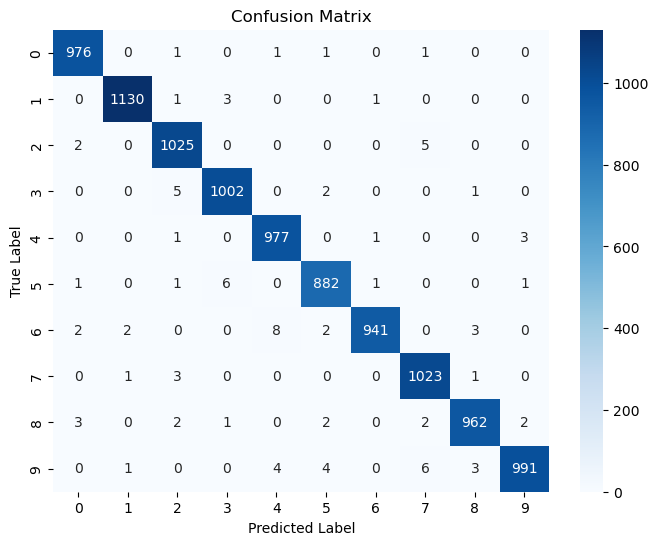

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 예측 수행
test_pred_prob = model.predict(test_images)
test_pred = np.argmax(test_pred_prob, axis=1)

# 혼동 행렬
cm = confusion_matrix(test_labels, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

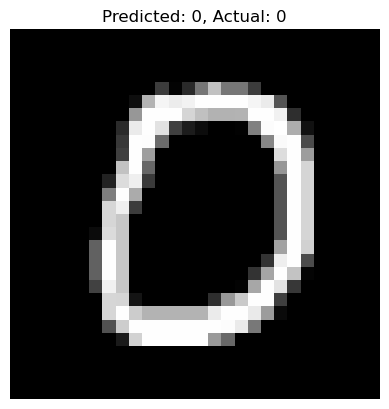

예측 결과: 0
실제 정답: 0


In [15]:
# 10번째 테스트 이미지 확인
index = 10
plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {test_pred[index]}, Actual: {test_labels[index]}")
plt.axis('off')
plt.show()

print("예측 결과:", test_pred[index])
print("실제 정답:", test_labels[index])